Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Wing"

position_role_stats = {
    'ball_progression' : [
        'Effective_Disposals',
        'Effective_Kicks',
        'Inside_50s',
        'Metres_Gained',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value',
    ],
    'ball_denial' : [
        'Rebound_50s',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Centre_Clearances',
        'Contested_Marks',
        'Contested_Possessions',
        'Ground_Ball_Gets',
        'Intercepts',
        'Pressure_Acts',
        'Stoppage_Clearances',
        'Tackles',
        'Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

Games   Age  Height  Weight  \
Player          Team                   Season                                
Josh Kelly      Greater Western Sydney 2021       16  26.0   184.0    83.0   
Nick Blakey     Sydney                 2022       11  22.0   195.0    84.0   
Hugh McCluggage Brisbane Lions         2022       21  24.0   185.0    86.0   
Paul Seedsman   Adelaide               2021       17  29.0   190.0    84.0   
Blake Acres     Fremantle              2022       19  26.0   189.0    92.0   
Hugh McCluggage Brisbane Lions         2021       17  23.0   185.0    87.0   
                                       2023       11  25.0   185.0    84.0   
Sam Menegola    Geelong                2021       11  29.0   189.0    89.0   
Josh Daicos     Collingwood            2023       17  24.0   178.0    77.0   
Mason Wood      St Kilda               2023       15  29.0   192.0    86.0   

                                               Debut_Year  Draft_Position  \
Player          Team                   Season                               
Josh Kelly      Greater Western Sydney 2021        2014.0             2.0   
Nick Blakey     Sydney                 2022        2019.0            10.0   
Hugh McCluggage Brisbane Lions         2022        2017.0             3.0   
Paul Seedsman   Adelaide               2021        2012.0            76.0   
Blake Acres     Fremantle              2022        2014.0            19.0   
Hugh McCluggage Brisbane Lions         2021        2017.0             3.0   
                                       2023        2017.0             3.0   
Sam Menegola    Geelong                2021        2016.0            66.0   
Josh Daicos     Collingwood            2023        2017.0            57.0   
Mason Wood      St Kilda               2023        2014.0            41.0   

                                               Possessions_sum  \
Player          Team                   Season                    
Josh Kelly      Greater Western Sydney 2021                434   
Nick Blakey     Sydney                 2022                164   
Hugh McCluggage Brisbane Lions         2022                516   
Paul Seedsman   Adelaide               2021                456   
Blake Acres     Fremantle              2022                408   
Hugh McCluggage Brisbane Lions         2021                406   
                                       2023                265   
Sam Menegola    Geelong                2021                267   
Josh Daicos     Collingwood            2023                428   
Mason Wood      St Kilda               2023                323   

                                               Stoppage_Clearances_sum  \
Player          Team                   Season                            
Josh Kelly      Greater Western Sydney 2021                         46   
Nick Blakey     Sydney                 2022                          5   
Hugh McCluggage Brisbane Lions         2022                         47   
Paul Seedsman   Adelaide               2021                         30   
Blake Acres     Fremantle              2022                         31   
Hugh McCluggage Brisbane Lions         2021                         43   
                                       2023                         27   
Sam Menegola    Geelong                2021                         24   
Josh Daicos     Collingwood            2023                         52   
Mason Wood      St Kilda               2023                         18   

                                               Uncontested_Possessions_sum  \
Player          Team                   Season                                
Josh Kelly      Greater Western Sydney 2021                            273   
Nick Blakey     Sydney                 2022                            122   
Hugh McCluggage Brisbane Lions         2022                            330   
Paul Seedsman   Adelaide               2021                            346   
Blake Acres     Fremantle          

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

wing_rating                      \
Season                                          2021      2022      2023   
Player            Team                                                     
Hugh McCluggage   Brisbane Lions            0.677530  0.791844  0.589780   
Josh Daicos       Collingwood               0.000000 -0.063390  0.568278   
Mason Wood        St Kilda                  0.000000  0.000000  0.488753   
Nick Blakey       Sydney                    0.000000  0.915969  0.000000   
Blake Acres       Fremantle                -0.213849  0.682597  0.000000   
Jordan Clark      Fremantle                 0.000000  0.380104  0.101683   
Karl Amon         Port Adelaide             0.326602  0.447148  0.000000   
Josh Kelly        Greater Western Sydney    1.286233  0.000000  0.000000   
Karl Amon         Hawthorn                  0.000000  0.000000  0.194909   
Jarrod Berry      Brisbane Lions            0.000000  0.000000  0.189157   
Steele Sidebottom Collingwood               0.000000 -0.191893  0.247307   
Marlion Pickett   Richmond                 -0.069176  0.280627  0.000000   
Paul Seedsman     Adelaide                  0.745249  0.000000  0.000000   
James Jordon      Melbourne                 0.000000  0.234286  0.000000   
Blake Acres       Carlton                   0.000000  0.000000  0.102247   
Sam Menegola      Geelong                   0.576391  0.000000  0.000000   
Nic Martin        Essendon                  0.000000  0.000000  0.066494   
Jack Ross         Richmond                  0.000000  0.000000  0.041854   
Isaac Smith       Geelong                   0.076951  0.037142  0.000000   
Andrew Gaff       West Coast                0.105175  0.000000  0.000000   

                                         overall_wing_rating  
Season                                                        
Player            Team                                        
Hugh McCluggage   Brisbane Lions                    0.659174  
Josh Daicos       Collingwood                       0.321950  
Mason Wood        St Kilda                          0.293252  
Nick Blakey       Sydney                            0.274791  
Blake Acres       Fremantle                         0.183394  
Jordan Clark      Fremantle                         0.175041  
Karl Amon         Port Adelaide                     0.166805  
Josh Kelly        Greater Western Sydney            0.128623  
Karl Amon         Hawthorn                          0.116945  
Jarrod Berry      Brisbane Lions                    0.113494  
Steele Sidebottom Collingwood                       0.090816  
Marlion Pickett   Richmond                          0.077271  
Paul Seedsman     Adelaide                          0.074525  
James Jordon      Melbourne                         0.070286  
Blake Acres       Carlton                           0.061348  
Sam Menegola      Geelong                           0.057639  
Nic Martin        Essendon                          0.039896  
Jack Ross         Richmond                          0.025112  
Isaac Smith       Geelong                           0.018838  
Andrew Gaff       West Coast                        0.010517

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [10]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

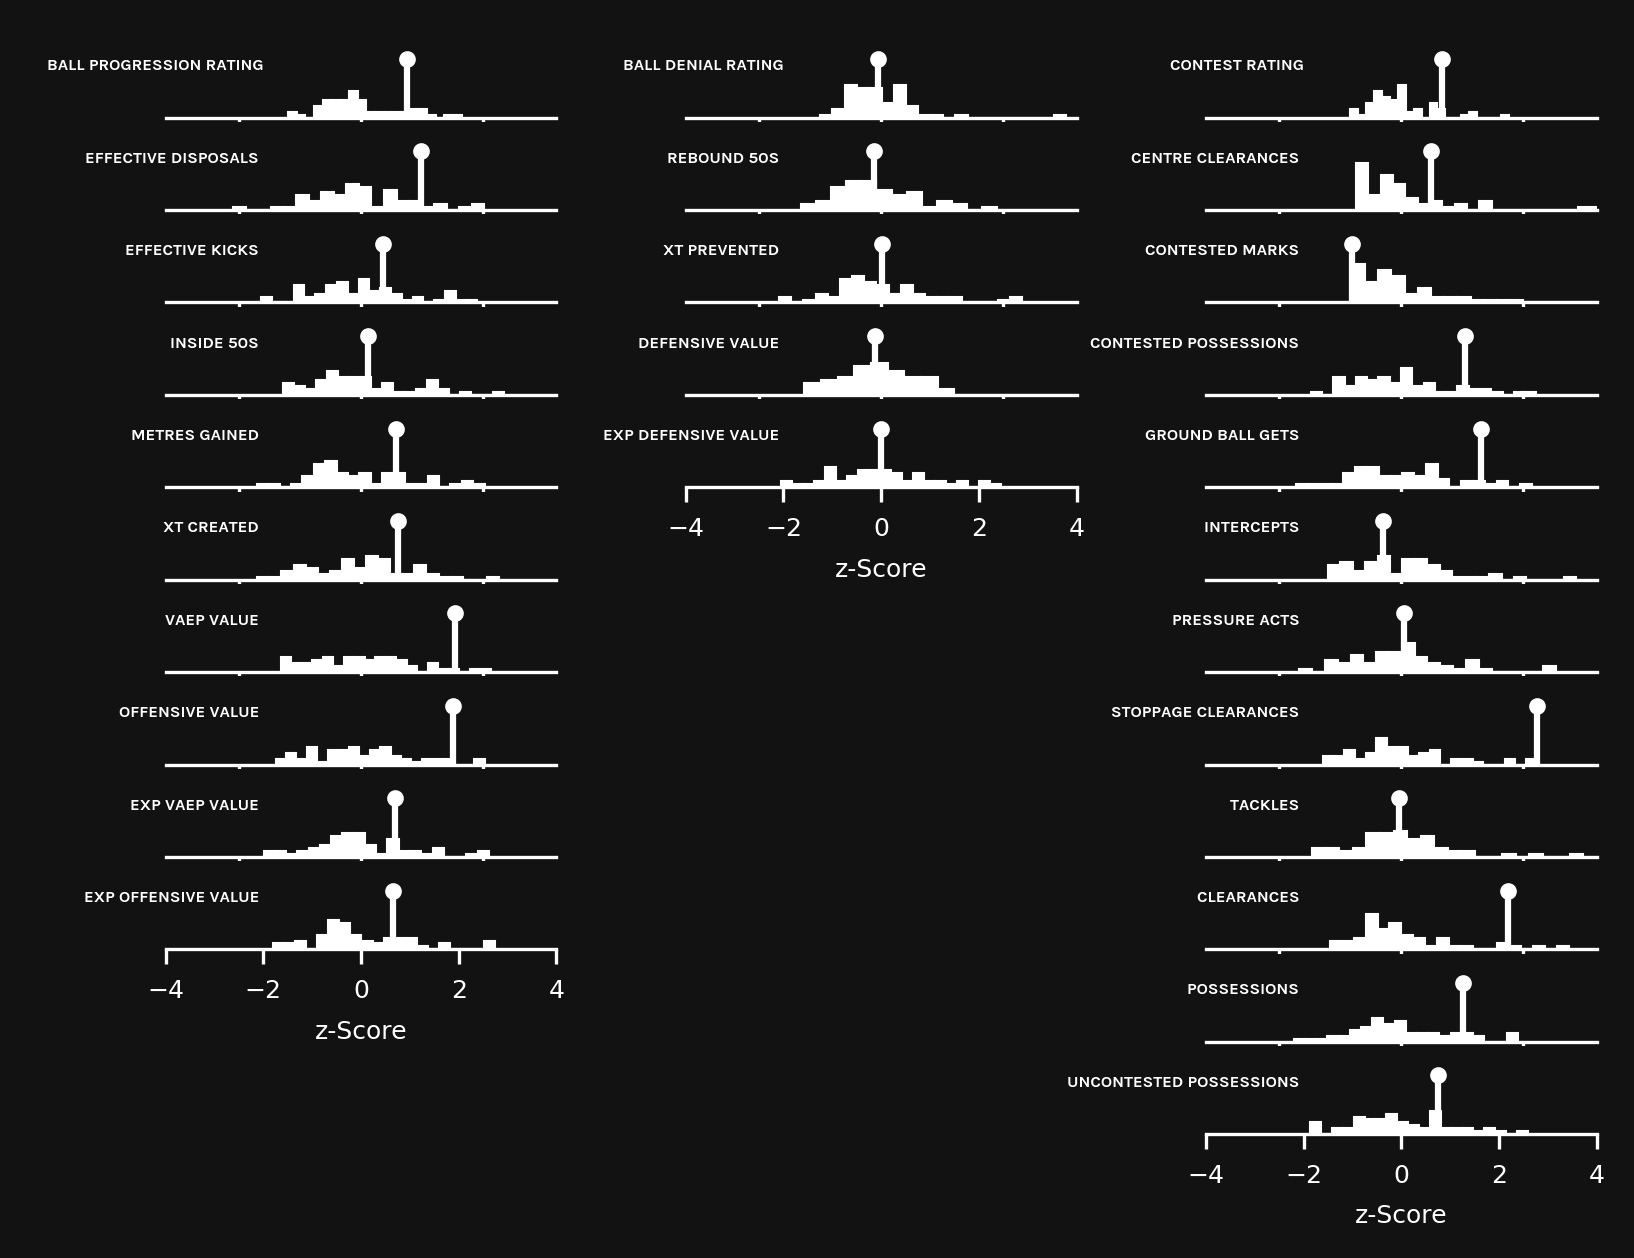

In [11]:
player = "Josh Daicos"
team = "Collingwood"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 30)

In [ ]:
player = "Zak Butters"
team = "Port Adelaide"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    